In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def extract_tag(tag):
    if len(tag) > 5:
        return tag.split("value': '",1)[1][:-3]

In [3]:
df_2024 = pd.read_csv('../2024_tags.csv',sep=';')
# df_headline = pd.concat([df_2023, df_2024], axis=0)
df_2024.rename(columns={'tags' : 'Теги', 'text_author': 'Текст отзыва'}, inplace=True)
df_2024['Теги'] = df_2024['Теги'].apply(extract_tag) 

df_headline = pd.read_csv('../Tanya_file.csv',encoding='utf-8-sig')
df_headline = pd.concat([df_headline, df_2024], axis=0)
len(df_headline)

163192

In [4]:
df_headline['Теги'].isnull().sum()

123923

In [5]:
df_headline['Дата написания отзыва'].isnull().sum()

26940

In [6]:
df_headline = df_headline[~df_headline['Дата написания отзыва'].isnull()]
len(df_headline)

136252

In [7]:
min(df_headline['Дата написания отзыва'].fillna('2030-01-01')), max(df_headline['Дата написания отзыва'].fillna('1800-01-01'))

('2019-01-01', '2023-04-30')

In [8]:
len(df_headline['Номер филиала'].value_counts().keys()), len(df_headline['Город'].value_counts().keys())

(11, 491)

In [9]:
len(df_headline['Дивизион'].value_counts().keys())

8

In [10]:
df_headline['Дата написания отзыва'] = pd.to_datetime(df_headline['Дата написания отзыва'])
df_headline['m_y'] = df_headline['Дата написания отзыва'].dt.to_period('M')
df_headline['q'] = df_headline['Дата написания отзыва'].dt.quarter
df_headline['y'] = df_headline['Дата написания отзыва'].dt.year
df_headline['q_y'] = df_headline['q'].astype(str) + '_' + df_headline['y'].astype(str)
df_headline.sample()

,Unnamed: 0,Сеть,Название филиала,Город,Адрес филиала,Номер филиала,Дивизион,Автор отзыва,Оценка,Текст отзыва,...,text_tonality,created_at,is_editable,is_removable,published_at,text,m_y,q,y,q_y
76049,76109,ВТБ отделения,Банк ВТБ,Магнитогорск,"проспект Ленина, 89",6602.0,УФО,Сергей Ирков,1.0,"Банк говно, поздравили с кредитной картой, при...",...,NaN,NaN,NaN,NaN,NaN,NaN,2021-12,4,2021,4_2021


In [11]:
df = df_headline.groupby(['Город', 'q_y', 'Тональность отзыва'], as_index=False).agg(
    text_count = ('Текст отзыва', 'nunique'))
df.head()

,Город,q_y,Тональность отзыва,text_count
0,Абакан,1_2019,Негативная,3
1,Абакан,1_2019,Отсутствует,0
2,Абакан,1_2020,Негативная,4
3,Абакан,1_2020,Нейтральная,2
4,Абакан,1_2020,Отсутствует,0


In [12]:
t = df.pivot_table('text_count', ['Город', 'q_y'], 'Тональность отзыва').fillna(0)
t.drop('Отсутствует', axis=1, inplace=True)
t = t.reset_index()

In [13]:
foo = list(np.unique(t['Город']))
city = random.choice(foo)
city

'Миллерово'

In [14]:
city = 'Санкт-Петербург'
sample = t[t['Город'] == city]
sample.sort_values('q_y', ascending=True)[:5]

Тональность отзыва,Город,q_y,Негативная,Нейтральная,Позитивная
4637,Санкт-Петербург,1_2019,92.0,15.0,34.0
4638,Санкт-Петербург,1_2020,337.0,110.0,207.0
4639,Санкт-Петербург,1_2021,218.0,40.0,88.0
4640,Санкт-Петербург,1_2022,432.0,53.0,198.0
4641,Санкт-Петербург,1_2023,259.0,80.0,264.0


In [21]:
# TODO: сортировака
sample['y'] = sample['q_y'].str[-4:]
sample['q'] = sample['q_y'].str[:1]
sample = sample.sort_values(['y', 'q'])
sample

Тональность отзыва,Город,q_y,Негативная,Нейтральная,Позитивная,y,q
4637,Санкт-Петербург,1_2019,92.0,15.0,34.0,2019,1
4642,Санкт-Петербург,2_2019,120.0,10.0,34.0,2019,2
4647,Санкт-Петербург,3_2019,401.0,104.0,194.0,2019,3
4651,Санкт-Петербург,4_2019,444.0,108.0,236.0,2019,4
4638,Санкт-Петербург,1_2020,337.0,110.0,207.0,2020,1
4643,Санкт-Петербург,2_2020,180.0,40.0,103.0,2020,2
4648,Санкт-Петербург,3_2020,268.0,50.0,114.0,2020,3
4652,Санкт-Петербург,4_2020,271.0,41.0,99.0,2020,4
4639,Санкт-Петербург,1_2021,218.0,40.0,88.0,2021,1
4644,Санкт-Петербург,2_2021,318.0,64.0,155.0,2021,2


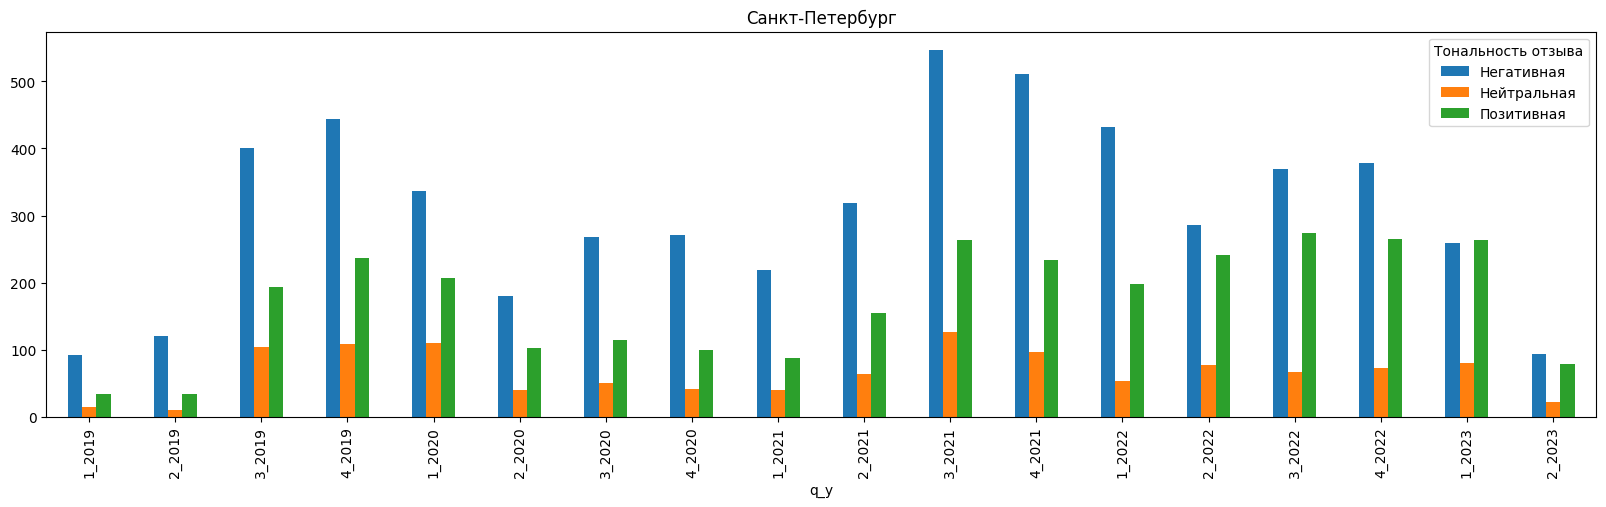

In [22]:
# Grouped bar chart with labels by date
sample.index = sample.q_y
ax = sample.plot.bar(figsize=(20, 5))
plt.title(f'{city}')
plt.show()

#### теги

In [23]:
df1 = df_headline[~df_headline['Теги'].isnull()].groupby(['Город', 'q_y', 'Теги'], as_index=False).agg(
    text_count = ('Текст отзыва', 'nunique'))
df1.head()

,Город,q_y,Теги,text_count
0,Абакан,1_2023,банкоматы,2
1,Абакан,1_2023,благодарность - скорость работы,3
2,Абакан,1_2023,благодарность - сотрудники,3
3,Абакан,1_2023,благодарность общая,2
4,Абакан,1_2023,качество обслуживания,2


In [24]:
# df1 = df1[df1['text_count'] > 2]

In [25]:
t1 = df1.pivot_table('text_count', ['Город', 'q_y'], 'Теги').fillna(0)
t1 = t1.reset_index()
t1.head()

Теги,Город,q_y,ВТБ Мобайл,ВТБ Онлайн,"ВТБ Онлайн, качество обслуживания",НПФ,СМБ,СМС,автокредит,банковская карта,...,платежи,разглашение информации,сбой,справки,страхование,счет,тарифы,чат-бот,экс-БМ,ячейки
0,Абакан,1_2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Абакан,2_2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Абакан,3_2022,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Абакан,4_2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Агрыз,3_2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
cols = list(df_headline['Теги'].value_counts().keys()[:7])
cols.extend(['Город','q_y'])
# cols = ['график работы', 'комфорт в офисе']

In [31]:
city = 'Москва'

In [28]:
foo = list(np.unique(t1['Город']))
city = random.choice(foo)
city

'Бийск'

In [32]:
sample1 = t1[t1['Город'] == city][cols]
sample1.head()

Теги,благодарность общая,качество обслуживания,благодарность - сотрудники,очередь,благодарность - скорость работы,график работы,комфорт в офисе,Город,q_y
797,619.0,501.0,341.0,245.0,57.0,32.0,47.0,Москва,1_2023
798,125.0,242.0,67.0,72.0,13.0,14.0,10.0,Москва,2_2023
799,326.0,315.0,200.0,376.0,67.0,27.0,28.0,Москва,3_2022
800,556.0,467.0,301.0,528.0,75.0,42.0,33.0,Москва,4_2022


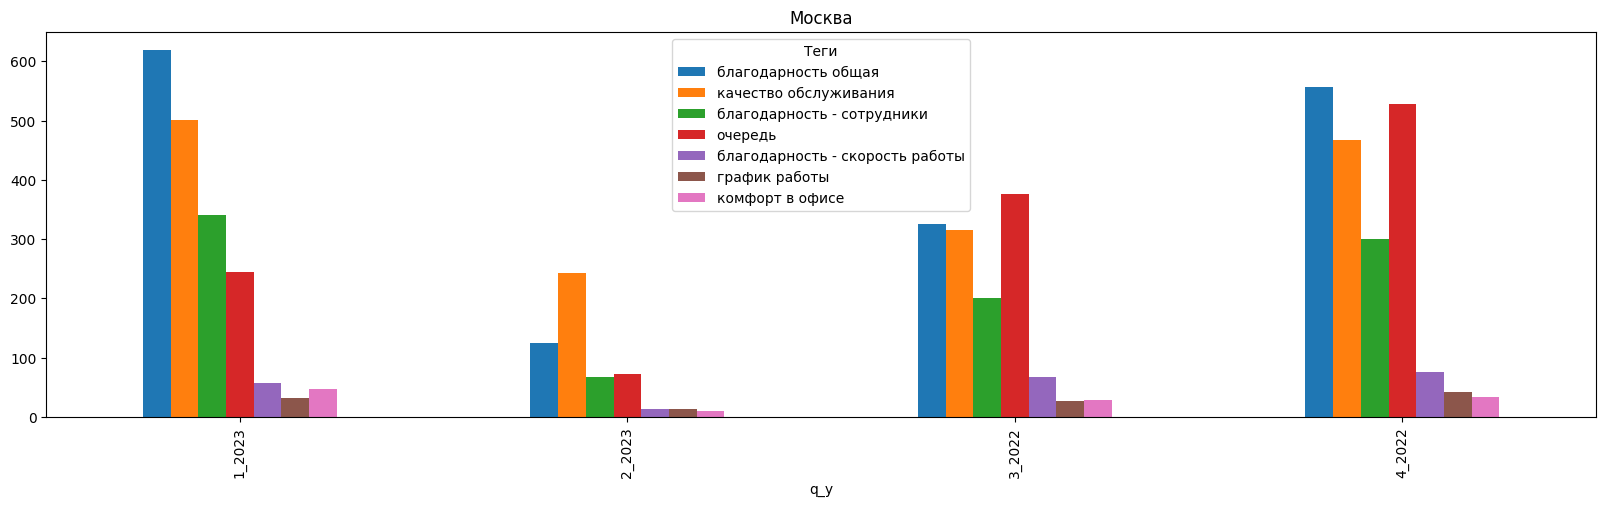

In [33]:
sample1.index = sample1.q_y
ax = sample1.plot.bar(figsize=(20, 5))
plt.title(f'{city}')
plt.show()